In [1]:
import torch
import torch.nn.functional as F

In [2]:
z = torch.rand(3, 5, requires_grad=True)
y = torch.randint(5, (3,)).long()

In [3]:
print(z)
print(y)

tensor([[0.4336, 0.2041, 0.0342, 0.6239, 0.1995],
        [0.8862, 0.4336, 0.1976, 0.6244, 0.8685],
        [0.8676, 0.9328, 0.7554, 0.6306, 0.4763]], requires_grad=True)
tensor([1, 1, 4])


In [4]:
torch.log(F.softmax(z, dim=1))

tensor([[-1.4966, -1.7261, -1.8960, -1.3063, -1.7307],
        [-1.3585, -1.8111, -2.0471, -1.6203, -1.3763],
        [-1.4876, -1.4224, -1.5998, -1.7246, -1.8789]], grad_fn=<LogBackward>)

In [5]:
print(z)

tensor([[0.4336, 0.2041, 0.0342, 0.6239, 0.1995],
        [0.8862, 0.4336, 0.1976, 0.6244, 0.8685],
        [0.8676, 0.9328, 0.7554, 0.6306, 0.4763]], requires_grad=True)


# MLP로 손글씨 분류하기

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt # 시각화를 위한 맷플롯립
from sklearn.datasets import load_digits
digits = load_digits()  # 1,797개의 이미지 데이터를 로드해서 digits에 저장

In [16]:
# images[index]를 사용해서 첫번쩨 샘플 출력해보기
print(digits.images[0]) # -> 8x8 행렬로 저장
print(digits.data[0]) # -> 64차원의 벡터로 변환해서 저장

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [13]:
# target[index]로 샘플의 label 확인하기
print(digits.target[0])

0


In [14]:
print('전체 샘플의 수 : {}'.format(len(digits.images)))

전체 샘플의 수 : 1797


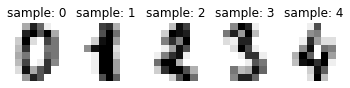

In [15]:
# 전체 샘플 중 상위 5개의 샘플만 시각화해보기
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]): # 5개의 샘플만 출력
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)       # %i : int값을 부호있는 10진수로 출력


In [17]:
X = digits.data # 이미지. 즉, 특성 행렬
Y = digits.target # 각 이미지에 대한 레이블

In [18]:
import torch
import torch.nn as nn
from torch import optim

In [19]:
model = nn.Sequential(
    nn.Linear(64, 32), # input_layer = 64, hidden_layer1 = 32
    nn.ReLU(),
    nn.Linear(32, 16), # hidden_layer2 = 32, hidden_layer3 = 16
    nn.ReLU(),
    nn.Linear(16, 10) # hidden_layer3 = 16, output_layer = 10
)

In [20]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

In [21]:
loss_fn = nn.CrossEntropyLoss()

In [22]:
optimizer = optim.Adam(model.parameters())

In [23]:
losses = []

In [24]:
for epoch in range(100):
  optimizer.zero_grad()
  y_pred = model(X) # forwar 연산
  loss = loss_fn(y_pred, Y)
  loss.backward()
  optimizer.step()

  if epoch % 10 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, 100, loss.item()
        ))

  losses.append(loss.item())

Epoch    0/100 Cost: 2.328705
Epoch   10/100 Cost: 2.099593
Epoch   20/100 Cost: 1.897932
Epoch   30/100 Cost: 1.656584
Epoch   40/100 Cost: 1.365511
Epoch   50/100 Cost: 1.054730
Epoch   60/100 Cost: 0.739857
Epoch   70/100 Cost: 0.495897
Epoch   80/100 Cost: 0.342940
Epoch   90/100 Cost: 0.255216


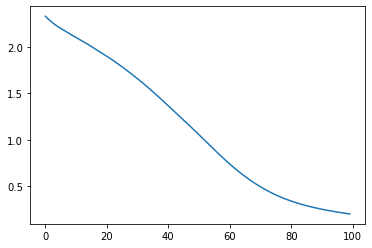

In [25]:
plt.plot(losses)

# MLP로 MNIST 분류하기

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [4]:
mnist.target = mnist.target.astype(np.int8)

In [5]:
X = mnist.data / 255  # 0-255값을 [0,1] 구간으로 정규화
y = mnist.target

In [6]:
plt.imshow(X[0].reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 레이블은 {:.0f}이다".format(y[0]))

KeyError: 0

In [7]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split